# **Homework 3:** Logistic regression and feature transforms

In this homework, we will use the following convention for dimentionality:

$N:\quad\text{Number of observations in a dataset, so } \mathcal{D} = \{ (\mathbf{x}_1, y_1),\ (\mathbf{x}_2, y_2),\ ... \,(\mathbf{x}_N, y_N) \}$

$d:\quad\ \text{Dimension of input (number of features), so } \mathbf{x}_i \in \mathbb{R}^d$

$C: \quad\ \text{Number of classes, so } y_i \in \{1,...,C\}$

In [1]:
# Run me first!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hw2_code_backup import get_dataset, gradient_descent, test_nll, test_nll_grad, test_predict, test_predict_probability, test_softmax, test_split

# UNCOMMENT IF NEEDED, SEE Q10
import autograd.numpy as np

# Background

In class we derived the logistic regression model for making predictions on binary data. Recall the the prediction function for logistic regression can be written as:

$$f(\mathbf{x}) = \mathbb{I}(\mathbf{x}^T\mathbf{w} \geq 0)$$

The estimated probability of $y=1$ as:
$$p(y=1\mid \mathbf{x}, \mathbf{w}) = \sigma(\mathbf{x}^T\mathbf{w})$$

Also recall that the negative log-likelihood loss for logistic regression can be written as:

$$\mathbf{NLL}(\mathbf{w}, \mathbf{X}, \mathbf{y})=-\sum_{i=1}^N \log \sigma\big((2 y_i - 1)\mathbf{x}_i^T\mathbf{w}\big)$$

and it's gradient with respect to $\mathbf{w}$ is:
$$\nabla_{\mathbf{w}}\mathbf{NLL}(\mathbf{w}, \mathbf{X}, \mathbf{y})=-\sum_{i=1}^N \big(1 - \sigma((2 y_i - 1)\mathbf{x}_i^T\mathbf{w})\big) \big(2 y_i - 1\big)\mathbf{x}_i$$


Below is an implementation of logistic regression using the functions we derived in class. In this example, we've created a logistic regression class that encapsulates the weights along with all of the functions we need to train and make predictions with the model.

In [2]:
def linear_function(X, w):
    # Returns a linear function of X (and adds bias)
    X = np.pad(X, ((0,0), (0,1)), constant_values=1.)
    return np.dot(X, w)

def sigmoid(x):
    # Computes the sigmoid function
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    def __init__(self, dims):
        '''
        Args:
            dims (int): d, the dimension of each input
        '''
        self.weights = np.zeros((dims + 1,))

    def predict(self, X):
        '''
        Predict labels given a set of inputs.

        Args:
            X (array): An N x d matrix of observations.
        Returns:
            pred (int array): A length N array of predictions in {0, 1}
        '''
        return (linear_function(X, self.weights) > 0).astype(int)
    
    def predict_probability(self, X):
        '''
        Predict the probability of each class given a set of inputs

        Args:
            X (array): An N x d matrix of observations.
        Returns:
            probs (array): A length N vector of predicted class probabilities
        '''
        return sigmoid(linear_function(X, self.weights))

    def accuracy(self, X, y):
        '''
        Compute the accuracy of the model's predictions on a dataset

        Args:
            X (array): An N x d matrix of observations.
            y (array): A length N vector of labels.
        Returns:
            acc (float): The accuracy of the classifier
        '''
        return np.mean(self.predict(X) == y)

    def nll(self, X, y):
        '''
        Compute the negative log-likelihood loss.

        Args:
            X (array): An N x d matrix of observations.
            y (int array): A length N vector of labels.
        Returns:
            nll (float): The NLL loss
        '''
        xw = linear_function(X, self.weights)
        py = sigmoid((2 * y - 1) * xw)
        return -np.sum(np.log(py))
    
    def nll_gradient(self, X, y):
        '''
        Compute the gradient of the negative log-likelihood loss.

        Args:
            X (array): An N x d matrix of observations.
            y (array): A length N vector of labels.
        Returns:
            grad (array): A length (d + 1) vector with the gradient
        '''
        xw = linear_function(X, self.weights)
        py = sigmoid((2 * y - 1) * xw)
        grad = ((1 - py) * (2 * y - 1)).reshape((-1, 1)) * np.pad(X, [(0,0), (0,1)], constant_values=1.)
        return -np.sum(grad, axis=0)
    
    def nll_and_grad(self, X, y):
        '''
        Compute both the NLL and it's gradient

        Args:
            X (array): An N x d matrix of observations.
            y (array): A length N vector of labels.
        Returns:
            nll (float): The NLL loss
            grad (array): A length (d + 1) vector with the gradient
        '''
        return self.nll(X, y), self.nll_gradient(X, y)



Let's take a look at how to use this class. The provided code includes a function `get_dataset` that downloads and loads one of serval different datasets. For this first example, we will use the humans and horses dataset, a dataset of images of humans and horses. We can load the dataset as follows:

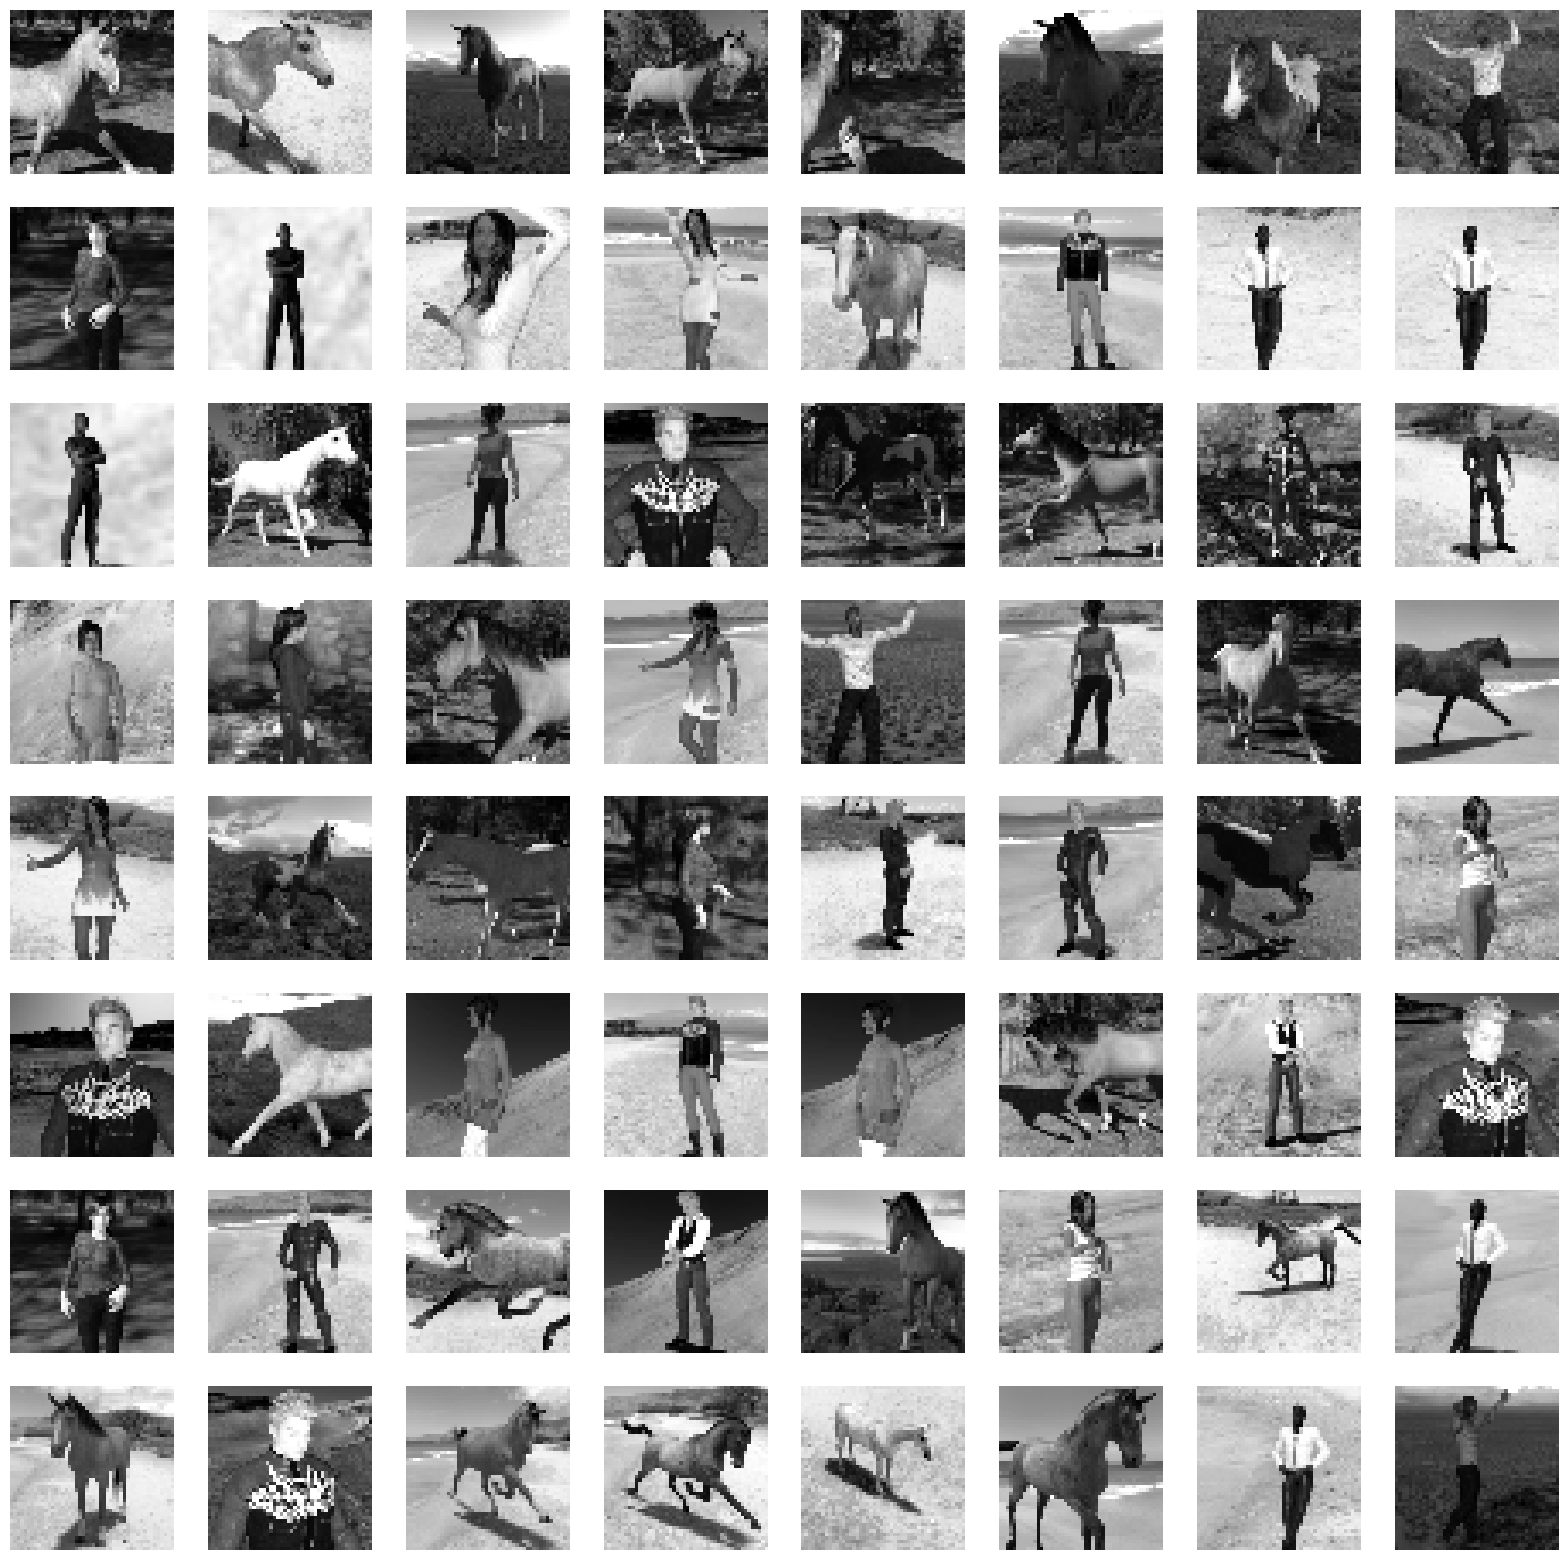

In [3]:
images, labels, label_names = get_dataset('horses_and_humans')

As we saw in class, before we can use logistic regression on image data, we first need to reshape it from a 3-dimensional array into a 2-dimensional matrix:

In [4]:
image_shape = images[0].shape                # Keep track of the original image shape
X = images.reshape((images.shape[0], -1))    # Reshape into an N x d matrix X
y = labels
print('Image shape: ', images.shape, ', X shape: ', X.shape)


Image shape:  (1027, 48, 48) , X shape:  (1027, 2304)


We can create a model using the `LogisticRegression` class, specifying the number of features ($d$):

In [5]:
model = LogisticRegression(X.shape[1])

We can train the model using the `gradient_descent` function provided in the support code:

In [6]:
losses = gradient_descent(model, X, y, lr=1e-6, steps=2500, image_shape=image_shape, watch=False)

# Uncomment to run with a live visualization
# losses = gradient_descent(model, X, y, lr=1e-6, steps=500, image_shape=images[0].shape, watch=True)

Loss 711.86, accuracy: 0.57:   0%|          | 0/2500 [00:00<?, ?it/s]

Loss 358.28, accuracy: 0.86: 100%|██████████| 2500/2500 [00:48<00:00, 51.11it/s]


We can make predictions using the built-in methods:

Prediction: human, probability: 0.641


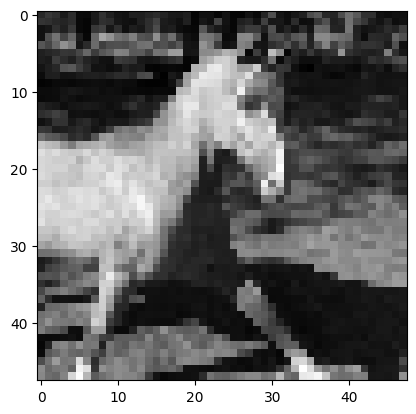

In [7]:
prediction = model.predict(X)
probabilities = model.predict_probability(X)

# Get the probability of the prediction [p(y=1) if prediction is 1 otherwise p(y=0)]
probability_of_prediction = np.where(prediction, probabilities, 1 - probabilities)

# Show an image and the corresponding prediction
plt.imshow(X[0].reshape(image_shape), cmap='gray')
print('Prediction: %s, probability: %.3f' % (label_names[prediction[0]], probability_of_prediction[0]))

# Part 1: Logistic regression and feature transforms

We'll first evaluate the performance of the logistic regression model above.

#### **Q1:** Train and test splits

Write a function to split the provided dataset into a *train set* and a *test set*. The train set should include 70% of the observations and the test set should include the remaining 30%. The data should be randomly shuffled to make sure there is no bias in the ordering.

In [8]:
def split_data(X, y):
    inds = np.arange(X.shape[0])
    np.random.shuffle(inds)
    Xtrain, Xtest = X[inds[:700]], X[inds[700:]]
    ytrain, ytest = y[inds[:700]], y[inds[700:]]

    return Xtrain, ytrain, Xtest, ytest

# Test the function
Xtrain, ytrain, Xtest, ytest = split_data(X, y)
test_split(X, y, Xtrain, ytrain, Xtest, ytest)

Passed!


#### **Q2:** Model evaluation

Using the function you just wrote, train a new logistic regression model on just the training data. Evaluate the **accuracy** and **loss** of the trained model on *both* the **training data** and the **test data**.

In [9]:
## YOUR CODE HERE
np.random.seed(10)
Xtrain, ytrain, Xtest, ytest = split_data(X, y)
model = LogisticRegression(X.shape[1])
losses = gradient_descent(model, Xtrain, ytrain, lr=1e-6, steps=2500, image_shape=image_shape, watch=False)
train_acc, train_loss = model.accuracy(Xtrain, ytrain), model.nll(Xtrain, ytrain)
test_acc, test_loss = model.accuracy(Xtest, ytest), model.nll(Xtest, ytest)

print('Training accuracy: %.3f, loss: %.3f' % (train_acc, train_loss))
print('Test accuracy: %.3f, loss: %.3f' % (test_acc, test_loss))

Loss 254.93, accuracy: 0.86: 100%|██████████| 2500/2500 [00:36<00:00, 67.96it/s]


Training accuracy: 0.863, loss: 254.908
Test accuracy: 0.813, loss: 141.683


Recall that in class we dicussed *feature transforms* an easy way to get more expressive models, using our linear model tools. Here we'll try applying some basic feature transforms to this problem and see if we can improve the performance.

#### **Q3:** Quadratic feature transforms

Create a *transformed* versions of the training and test datasets by adding quadratic features. Only add the unary quadratic terms ($x_i^2$) **not** the cross terms ($x_i x_j$). For a single dimension the transform would look like:
$$\phi(x_i) = \begin{bmatrix} x_i \\ x_i^2 \end{bmatrix}$$


In general, the transform should look like:

$$\textbf{Single observation: }\phi(\mathbf{x}) = \begin{bmatrix}x_1 \\ \vdots \\ x_d \\ x_1^2 \\ \vdots \\ x_d^2 \end{bmatrix}, \quad \textbf{Dataset: } \phi(\mathbf{X}) = \begin{bmatrix}x_{11} & x_{12} & \dots & x_{1d} & x_{11}^2 & \dots & x_{1d}^2 \\ x_{21} & x_{22} & \dots & x_{2d} & x_{21}^2 & \dots & x_{2d}^2 \\  \vdots & \vdots & & \vdots & \vdots & & \vdots \\ x_{N1} & x_{N2} & \dots & x_{Nd} & x_{N1}^2 & \dots & x_{Nd}^2 \\  \end{bmatrix} $$



In [10]:
## YOUR CODE HERE
Xtrain_quad = np.concatenate([Xtrain, Xtrain ** 2], axis=1)
Xtest_quad = np.concatenate([Xtest, Xtest ** 2], axis=1)

assert Xtrain_quad.shape == (Xtrain.shape[0], 2 * Xtrain.shape[1])

#### **Q4:** Evaluating quadratic transforms

Train a **new** logistic regression model and evaluate the training and test accuracy and loss as you did in question 2.

In [11]:
## YOUR CODE HERE
model = LogisticRegression(Xtrain_quad.shape[1])
losses = gradient_descent(model, Xtrain_quad, ytrain, lr=1e-6, steps=2500, image_shape=image_shape, watch=False)
train_acc, train_loss = model.accuracy(Xtrain_quad, ytrain), model.nll(Xtrain_quad, ytrain)
test_acc, test_loss = model.accuracy(Xtest_quad, ytest), model.nll(Xtest_quad, ytest)


print('Training accuracy: %.3f, loss: %.3f' % (train_acc, train_loss))
print('Test accuracy: %.3f, loss: %.3f' % (test_acc, test_loss))

Loss 190.14, accuracy: 0.92: 100%|██████████| 2500/2500 [01:00<00:00, 41.39it/s]


Training accuracy: 0.920, loss: 190.113
Test accuracy: 0.853, loss: 109.164


#### **Q5:** Evaluating sin transforms

Repeat questions 3 & 4, but using a different transform, defined as:

$$\phi(x_i) = \begin{bmatrix} x_i \\ \sin(10 x_i) \end{bmatrix}$$

In [12]:
## YOUR CODE HERE
Xtrain_sin = np.concatenate([Xtrain, np.sin(10 * Xtrain)], axis=1)
Xtest_sin = np.concatenate([Xtest, np.sin(10 * Xtest)], axis=1)

assert Xtrain_sin.shape == (Xtrain.shape[0], 2 * Xtrain.shape[1])

model = LogisticRegression(Xtrain_sin.shape[1])
losses = gradient_descent(model, Xtrain_sin, ytrain, lr=1e-6, steps=2500, image_shape=image_shape, watch=False)
train_acc, train_loss = model.accuracy(Xtrain_sin, ytrain), model.nll(Xtrain_sin, ytrain)
test_acc, test_loss = model.accuracy(Xtest_sin, ytest), model.nll(Xtest_sin, ytest)


print('Training accuracy: %.3f, loss: %.3f' % (train_acc, train_loss))
print('Test accuracy: %.3f, loss: %.3f' % (test_acc, test_loss))

  0%|          | 0/2500 [00:00<?, ?it/s]

Loss 136.40, accuracy: 0.98: 100%|██████████| 2500/2500 [00:59<00:00, 42.21it/s]


Training accuracy: 0.979, loss: 136.363
Test accuracy: 0.844, loss: 121.323


#### **Q6:** Comparing feature transforms

Based on the results, would you use any feature transform for this problem? If so, which one?

YOUR ANSWER HERE

# Part 2: Multinomial logistic regression

In this part, we will look at implementing **multinomial logistic regression**. Recall that this model extends logistic regression to the cases where there may be more than 2 possible labels, so $y\in\{1,...,C\}$, where $C$ is the number of *classes* (possible outputs).

We saw that rather than having a single weight vector, this model has a weight vector for *each class*, $\mathbf{w}_1,...,\mathbf{w}_C$. We can view these together as the *rows* of a weight matrix $\mathbf{W}$:
$$\mathbf{W} = \begin{bmatrix} \mathbf{w}_1^T \\ \mathbf{w}_2^T \\ \vdots \\ \mathbf{w}_C^T \end{bmatrix}$$

We saw that the prediction function for this model was:
$$f(\mathbf{x}) = \underset{c\in \{1,...,C\}}{\text{argmax}}\ \mathbf{x}^T\mathbf{w}$$

The probabilistic model was defined as:
$$
p(y_i=c \mid \mathbf{x}, \mathbf{W}) = \text{softmax}(\mathbf{x}^T\mathbf{W})_c=\frac{e^{\mathbf{x}^T\mathbf{w}_c}}{\sum_{j=1}^Ce^{\mathbf{x}^T\mathbf{w}_j}}
$$

The negative log-likelihood loss was defined as:
$$
\textbf{NLL}(\mathbf{W}, \mathbf{X}, \mathbf{y})=-\sum_{i=1}^N \bigg(\mathbf{x}_i^T\mathbf{w}_{y_i}- \log\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}\bigg)
$$

In the next few questions we will create a *modified* version of our logistic regression class that supports multinomal logistic regression. The class definition is below. A few things to note:

**1:** We will still assume `y` is an array of `int` in numpy. We can convert an array `y` to an array of `int` with `y = y.astype(int)` and back with `y = y.astype(float)`

**2:** Remeber that numpy is **0-indexed**, so our classes will actually be $0$ to $C-1$, ($y\in \{0,...,C-1\}$)

**2:** We will assume our weight matrix is an $C \times d$ matrix as shown below

In [13]:
class MultinomialLogisticRegression(LogisticRegression):
    def __init__(self, classes, dims):
        '''
        Args:
            classes (int): C, the number of possible outputs
            dims (int): d, the dimension of each input
        '''
        self.classes = classes
        self.weights = np.zeros((classes, dims + 1,))

#### **Q7:** Prediction

Write a function to make a prediction using the multinomial logistic regression prediction rule above. (assume `self` is the `MultinomialLogisticRegression` object)

In [14]:
def multiclass_predict(self, X):
    '''
    Predict labels given a set of inputs.

    Args:
        X (array): An N x d matrix of observations.
    Returns:
        pred (int array): A length N array of predictions in {0,...,(C-1)}
    '''
    W = self.weights

    ## YOUR CODE HERE
    pred = linear_function(X, self.weights.T).argmax(axis=-1)
    return pred

## Test the function
test_predict(multiclass_predict)

## Add it to our class
MultinomialLogisticRegression.predict = multiclass_predict

Passed!


#### **Q7:** Softmax

Implement the softmax function.
$$
\text{softmax}(\mathbf{x})_c = \frac{e^{x_c}}{\sum_{j=1}^Ce^{x_j}}, \quad
\text{softmax}(\mathbf{x}) = \begin{bmatrix}\frac{e^{x_1}}{\sum_{j=1}^Ce^{x_j}} \\ \frac{e^{x_2}}{\sum_{j=1}^Ce^{x_j}} \\ \vdots \\ \frac{e^{x_C}}{\sum_{j=1}^Ce^{x_j}} \end{bmatrix}
$$

You function should accept inputs as either a length $C$ vector or as an $N\times C$ matrix. If the input is a matrix, the softmax function should be applied to each **row** of the matrix.

In [15]:
def softmax(x):
    '''
    Apply the softmax function to a vector or matrix

    Args:
        X (array): An N x C matrix of transformed inputs (or a length C vector)
    Returns:
        probs (array):  An N x C matrix with the softmax function applied to each row
    ''' 
    ex = np.exp(x)
    return ex / np.sum(ex, axis=-1, keepdims=True)


test_softmax(softmax)

Passed!


#### **Q7:** Multinomial logistic regression NLL

Implement a function to compute the multinomial logistic regression negative log-likelihood.
$$
\textbf{NLL}(\mathbf{W}, \mathbf{X}, \mathbf{y})=-\sum_{i=1}^N \bigg(\mathbf{x}_i^T\mathbf{w}_{y_i}- \log\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}\bigg)
$$

***Hint:** Recall that $y_i$ is an integer, so $\mathbf{w}_{j}$ refers to the row of the weight matrix at index $y_i$ (you could access this as `W[y[i]]`). It's possible to answer this question without loops, but you may find it easier to loop over each possible class/observation.*



In [16]:
def nll(self, X, y):
    '''
    Compute the negative log-likelihood loss.

    Args:
        X (array): An N x d matrix of observations.
        y (int array): A length N vector of labels.
    Returns:
        nll (float): The NLL loss
    '''
    xw = linear_function(X, self.weights.T)
    loss = xw[np.arange(X.shape[0]), y].sum() - np.log(np.sum(np.exp(xw), axis=1)).sum()
    return -loss

test_nll(nll)
MultinomialLogisticRegression.nll = nll

Passed!


#### **Q8:** Gradient of NLL

Derive the gradient of the negative log-likelihood with respect to $\mathbf{w}_c$, the weight vector for a **single class**.

***Hint:** Again note that $\mathbf{w}_{y_i}$ refers to the weight vector corresponding to the **true** class of observation $i$, and so only depend on $\mathbf{w}_c$ if $y_i=c$. This means that:*
$$\frac{d}{d\mathbf{w}_c} \mathbf{x_i}^T \mathbf{w}_{y_i} = \begin{cases}\mathbf{x}_i \quad \text{ if } y_i = c \\ 0 \quad \ \text{ otherwise}  \end{cases}$$
*We can write this more compactly using an indicator function:*
$$\frac{d}{d\mathbf{w}_c} \mathbf{x_i}^T \mathbf{w}_{y_i} = \mathbb{I}(y_i=c)\ \mathbf{x}_i $$

$$\nabla_{\mathbf{w}_c} \textbf{NLL}(\mathbf{W}, \mathbf{X}, \mathbf{y}) = \frac{d}{d\mathbf{w}_c}-\sum_{i=1}^N \bigg(\mathbf{x}_i^T\mathbf{w}_{y_i}- \log\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}\bigg)$$

The first step is to apply the addition/subtraction rule:

$$= -\sum_{i=1}^N \bigg(\frac{d}{d\mathbf{w}_c}\big(\mathbf{x}_i^T\mathbf{w}_{y_i}\big)- \frac{d}{d\mathbf{w}_c}\log\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}\bigg)$$

Then we can apply the rule we see above:
$$= -\sum_{i=1}^N \bigg(\mathbb{I}(y_i=c)\ \mathbf{x}_i- \frac{d}{d\mathbf{w}_c}\log\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}\bigg)$$
Next we'll apply the chain rule to the $\log$ function:
$$= -\sum_{i=1}^N \bigg(\mathbb{I}(y_i=c)\ \mathbf{x}_i- \bigg(\frac{1}{\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}}\bigg)\ \frac{d}{d\mathbf{w}_c} \bigg(\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}\bigg) \bigg)$$
We see that only one term in the inner summation depends on $\mathbf{w}_c$
$$= -\sum_{i=1}^N \bigg(\mathbb{I}(y_i=c)\ \mathbf{x}_i- \bigg(\frac{1}{\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}}\bigg)\  \bigg(\frac{d}{d\mathbf{w}_c}e^{\mathbf{x}_i^T\mathbf{w}_{c}}\bigg) \bigg)$$
Applying the chain rule to the exponential we get:
$$= -\sum_{i=1}^N \bigg(\mathbb{I}(y_i=c)\ \mathbf{x}_i- \bigg(\frac{1}{\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}}\bigg)\  \bigg(e^{\mathbf{x}_i^T\mathbf{w}_{c}} \frac{d}{d\mathbf{w}_c} \mathbf{x}_i^T\mathbf{w}_{c}\bigg) \bigg)$$
$$= -\sum_{i=1}^N \bigg(\mathbb{I}(y_i=c)\ \mathbf{x}_i- \bigg(\frac{1}{\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}}\bigg)\  \bigg(e^{\mathbf{x}_i^T\mathbf{w}_{c}}  \mathbf{x}_i\bigg) \bigg)$$
Factoring out $\mathbf{x}_i$ we get:
$$= -\sum_{i=1}^N  \mathbf{x}_i\bigg(\mathbb{I}(y_i=c) - \frac{e^{\mathbf{x}_i^T\mathbf{w}_{c}}  }{\sum_{j=1}^Ce^{\mathbf{x}_i^T\mathbf{w}_{j}}} \bigg)$$

#### **Q9:** Implementing the gradient

Write a function that computes the gradient of the negative log-likelihood with repect to the weight vector for a given class, using the results of the derivation above.

In [17]:
def nll_gradient_c(W, X, y, c):
    '''
    Compute the negative log-likelihood loss.

    Args:
        W (array): The C x d weight matrix.
        X (array): An N x d matrix of observations.
        y (int array): A length N vector of labels.
        c (int): The class to compute the gradient for
    Returns:
        grad (array): A length d vector representing the gradient with respect to w_c
    '''
    X = np.pad(X, [(0, 0), (0, 1)], constant_values=1.)
    grad = 1 / np.exp(np.dot(X, W.T)).sum(axis=-1)

    gradc = - X[y == c].sum(axis=0)
    wc = W[:, c]
    exwc = np.exp(np.dot(X, wc))
    gradc = gradc + (grad * exwc).dot(X)
    return gradc



#### **Q10:** Implementing the full gradient

Using the function you just wrote, write a function to compute the full gradient with respect to the $C \times d$ weight matrix.
***Hint:** The output should be a matrix!*

In [18]:
def nll_gradient(self, X, y):
    '''
    Compute the negative log-likelihood loss.

    Args:
        X (array): An N x d matrix of observations.
        y (int array): A length N vector of labels.
    Returns:
        grad (array): A C x d matrix representing the gradient with respect to W
    '''
    X = np.pad(X, [(0, 0), (0, 1)], constant_values=1.)
    grad = 1 / np.exp(np.dot(X, self.weights.T)).sum(axis=-1)

    grads = []
    for c in range(self.classes):
        gradc = - X[y == c].sum(axis=0)
        wc = self.weights[c]
        exwc = np.exp(np.dot(X, wc))
        gradc = gradc + (grad * exwc).dot(X)
        grads.append(gradc)
    return np.stack(grads)


test_nll_grad(nll_gradient)
MultinomialLogisticRegression.nll_gradient = nll_gradient

Passed!


Note if you are struggling with this problem, you can uncomment the following cell and the import statement at the top of this notebook to get a valid gradient function based on you nll function.

In [19]:
'''
def autograd_nll_gradient(self, X, y):
    import autograd
    def autograd_nll(W):
        temp_model = MultinomialLogisticRegression(self.classes, X.shape[1])
        temp_model.weights = W
        return temp_model.nll(X, y)
    return autograd.grad(autograd_nll)(self.weights)
#test_nll_grad(nll_gradient)
test_nll_grad(autograd_nll_gradient)
MultinomialLogisticRegression.nll_gradient = autograd_nll_gradient
'''

'\ndef autograd_nll_gradient(self, X, y):\n    import autograd\n    def autograd_nll(W):\n        temp_model = MultinomialLogisticRegression(self.classes, X.shape[1])\n        temp_model.weights = W\n        return temp_model.nll(X, y)\n    return autograd.grad(autograd_nll)(self.weights)\n#test_nll_grad(nll_gradient)\ntest_nll_grad(autograd_nll_gradient)\nMultinomialLogisticRegression.nll_gradient = autograd_nll_gradient\n'

Finally, we will test out our multinomial logistic regression classifier on the MNIST dataset (https://en.wikipedia.org/wiki/MNIST_database), one of the most popular datasets in machine learning! We'll start by loading it as before.

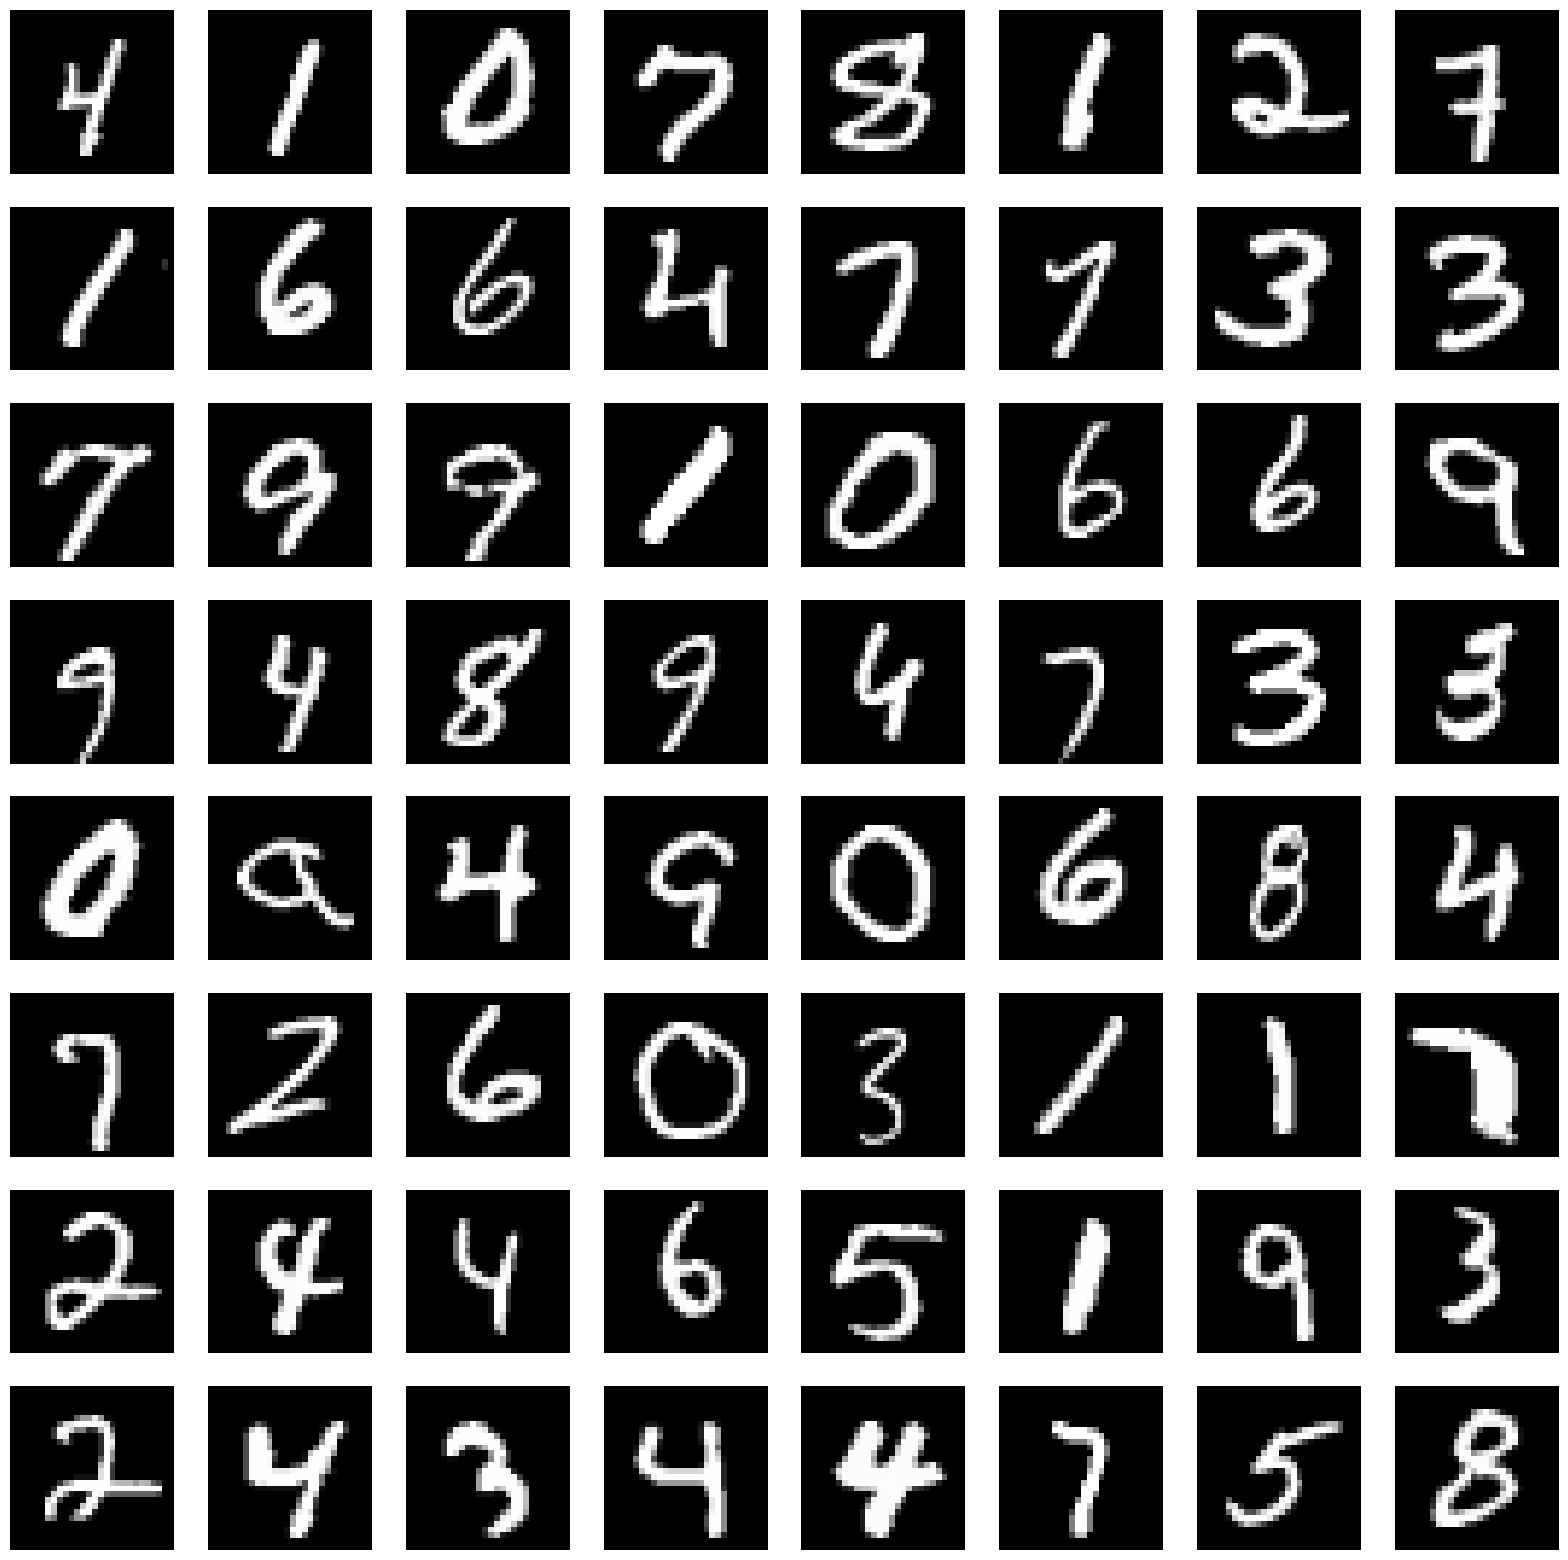

Image shape:  (5000, 28, 28) , X shape:  (5000, 784)


In [20]:
images, labels, label_names = get_dataset('mnist')

image_shape = images[0].shape                # Keep track of the original image shape
X = images.reshape((images.shape[0], -1))    # Reshape into an N x d matrix X
y = labels
print('Image shape: ', images.shape, ', X shape: ', X.shape)

# Create the initial model
model = MultinomialLogisticRegression(classes=len(label_names), dims=X.shape[1])

#### **Q11:** Repeat question 2 using the MNIST dataset

In [21]:
Xtrain, ytrain, Xtest, ytest = split_data(X, y)

model = MultinomialLogisticRegression(classes=len(label_names), dims=X.shape[1])
losses = gradient_descent(model, Xtrain, ytrain, lr=1e-6, steps=2500, image_shape=image_shape, watch=False)
train_acc, train_loss = model.accuracy(Xtrain, ytrain), model.nll(Xtrain, ytrain)
test_acc, test_loss = model.accuracy(Xtest, ytest), model.nll(Xtest, ytest)

print('Training accuracy: %.3f, loss: %.3f' % (train_acc, train_loss))
print('Test accuracy: %.3f, loss: %.3f' % (test_acc, test_loss))

print('Training accuracy: %.3f, loss: %.3f' % (train_acc, train_loss))
print('Test accuracy: %.3f, loss: %.3f' % (test_acc, test_loss))

Loss 442.68, accuracy: 0.87: 100%|██████████| 2500/2500 [01:07<00:00, 37.21it/s]


Training accuracy: 0.870, loss: 442.595
Test accuracy: 0.845, loss: 3025.243
Training accuracy: 0.870, loss: 442.595
Test accuracy: 0.845, loss: 3025.243


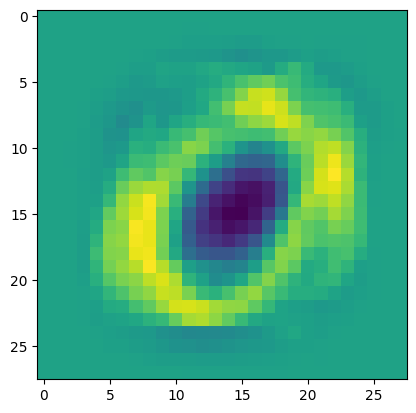

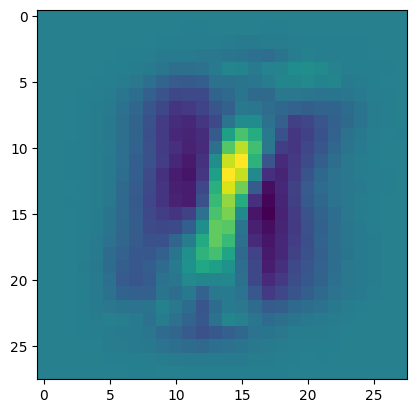

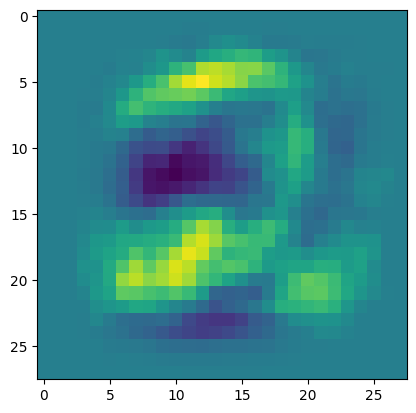

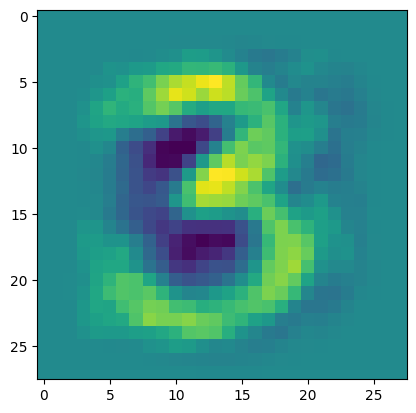

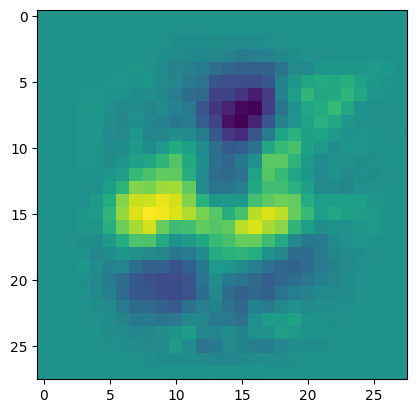

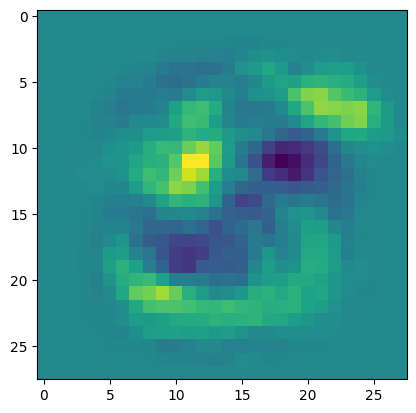

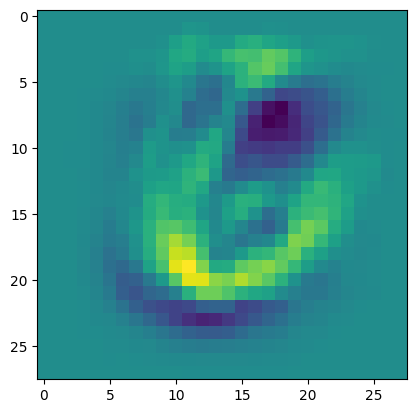

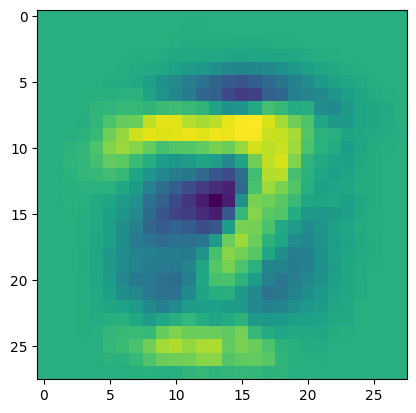

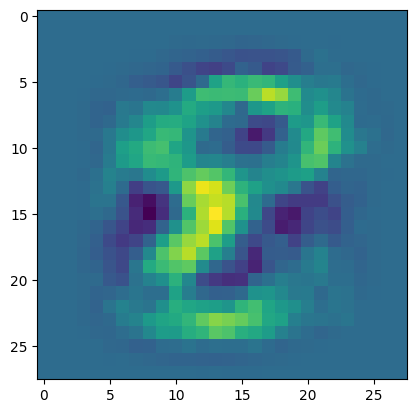

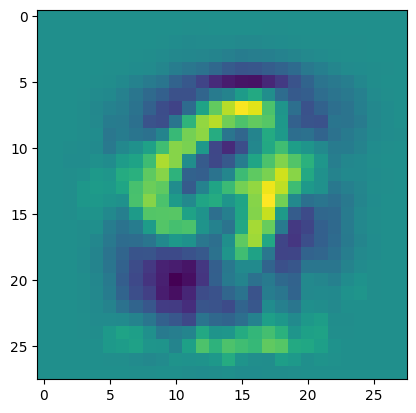

In [22]:
for i in range(10):
    plt.imshow(model.weights[i, :-1].reshape((28, 28)))
    plt.show()

#### **Q12:** Repeat question 3 using the MNIST dataset

In [23]:
## YOUR CODE HERE
Xtrain_quad = np.concatenate([Xtrain, Xtrain ** 2], axis=1)
Xtest_quad = np.concatenate([Xtest, Xtest ** 2], axis=1)

assert Xtrain_quad.shape == (Xtrain.shape[0], 2 * Xtrain.shape[1])
assert Xtrain_quad.shape == (Xtrain.shape[0], 2 * Xtrain.shape[1])

#### **Q13:** Repeat question 4 using the MNIST dataset

In [24]:
## YOUR CODE HERE

model = MultinomialLogisticRegression(classes=len(label_names), dims=Xtrain_quad.shape[1])

losses = gradient_descent(model, Xtrain_quad, ytrain, lr=1e-6, steps=2500, image_shape=image_shape, watch=False)
train_acc, train_loss = model.accuracy(Xtrain_quad, ytrain), model.nll(Xtrain_quad, ytrain)
test_acc, test_loss = model.accuracy(Xtest_quad, ytest), model.nll(Xtest_quad, ytest)


print('Training accuracy: %.3f, loss: %.3f' % (train_acc, train_loss))
print('Test accuracy: %.3f, loss: %.3f' % (test_acc, test_loss))

Loss 414.28, accuracy: 0.89: 100%|██████████| 2500/2500 [01:16<00:00, 32.50it/s]


Training accuracy: 0.887, loss: 414.195
Test accuracy: 0.850, loss: 2944.114


#### **Q14:** Repeat question 5 using the MNIST dataset

In [25]:
## YOUR CODE HERE
Xtrain_sin = np.concatenate([Xtrain, np.sin(10 * Xtrain)], axis=1)
Xtest_sin = np.concatenate([Xtest, np.sin(10 * Xtest)], axis=1)

assert Xtrain_sin.shape == (Xtrain.shape[0], 2 * Xtrain.shape[1])

model = MultinomialLogisticRegression(len(label_names), Xtrain_sin.shape[1])
losses = gradient_descent(model, Xtrain_sin, ytrain, lr=1e-6, steps=2500, image_shape=image_shape, watch=False)
train_acc, train_loss = model.accuracy(Xtrain_sin, ytrain), model.nll(Xtrain_sin, ytrain)
test_acc, test_loss = model.accuracy(Xtest_sin, ytest), model.nll(Xtest_sin, ytest)


print('Training accuracy: %.3f, loss: %.3f' % (train_acc, train_loss))
print('Test accuracy: %.3f, loss: %.3f' % (test_acc, test_loss))

Loss 388.06, accuracy: 0.89: 100%|██████████| 2500/2500 [01:12<00:00, 34.38it/s]


Training accuracy: 0.890, loss: 387.972
Test accuracy: 0.850, loss: 2865.387


#### **Q15:** Final evaluation

Based on the results, would you use any feature transform for this problem? If so, which one?

In this case we see that the feature transform makes very little difference.